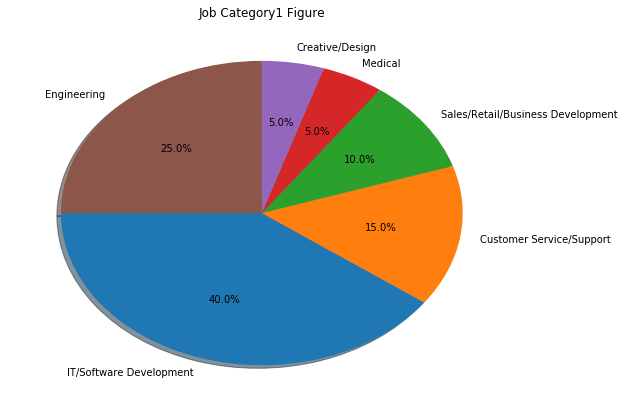

job : Electrical Maintenance Engineer     |     min_salary : 4    13000.0
dtype: float64
job : IT Adminstrator     |     min_salary : 5    8000.0
dtype: float64
job : Sr Web Application & Web Designer      |     min_salary : 13    5000.0
dtype: float64
job : Veterinary Medical Representative     |     min_salary : 18    4500.0
dtype: float64
job : Sales & Marketing Agent     |     min_salary : 0    5500.0
dtype: float64
job : Senior Software Tester     |     min_salary : 12    12000.0
dtype: float64
job : e-payments System Administrator     |     min_salary : 6    8000.0
dtype: float64
job : Graphic Designer     |     min_salary : 10    3050.0
dtype: float64
job : Technical Support Engineer     |     min_salary : 14    5200.0
dtype: float64
job : PROCESS ENGINEER                           |     min_salary : 7    25000.0
dtype: float64
job : Titanium Mobile Developer     |     min_salary : 16    5500.0
dtype: float64
job : Direct Sales and Marketing Agent     |     min_salary : 19    40

In [ ]:
import sys
from PyQt5.QtCore import pyqtSlot
from PyQt5.QtWidgets import QApplication, QDialog
from PyQt5.QtGui import *
from PyQt5.uic import loadUi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file1 = pd.read_csv("Wuzzuf_Job_Posts_Sample.csv")
df = pd.DataFrame(data= file1).head(20)
file2 = pd.read_csv("Wuzzuf_Applications_Sample.csv")
df2 = pd.DataFrame(data = file2).head(70)


class Main(QDialog):
    def __init__(self):
        super(Main , self).__init__()
        loadUi("project1.ui" , self)
        self.pushButton.clicked.connect(self.plot_cat1)
        self.pushButton2.clicked.connect(self.plot_cat2)
        self.pushButton3.clicked.connect(self.plot_cat3)
        self.pushButton4.clicked.connect(self.plot_indust1)
        self.pushButton5.clicked.connect(self.plot_indust2)
        self.pushButton6.clicked.connect(self.plot_indust3)
        self.pushButton7.clicked.connect(self.jobs_req)
        self.pushButton8.clicked.connect(self.user_dist)
        self.pushButton9.clicked.connect(self.cities_distrib)
        self.pushButton10.clicked.connect(self.city_details)
        self.pushButton11.clicked.connect(self.job_desc)
        self.pushButton12.clicked.connect(self.salary_mean)

        
    def plot_cat1(self):
        category = set(df.job_category1)
        x =[x for x in category]
        y = [ len(df[df['job_category1']== x]) for x in category]
        plt.rcParams['figure.figsize'] = (9,7)
        plt.pie(y , labels= x , shadow= True ,startangle=180 ,autopct='%1.1f%%')
        plt.title("Job Category1 Figure")
        plt.show()
        
        
    def plot_cat2(self):
        category = set(df.job_category2)
        x =[x for x in category]
        y = [ len(df[df['job_category2']== x]) for x in category]

        plt.pie(y , labels= x , shadow= True ,startangle=180 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (9,7)
        plt.title("Job Category2 Figure")
        plt.show()

    
    
    def plot_cat3(self):
        category = set(df.job_category3)
        x =[x for x in category]
        y = [ len(df[df['job_category3']== x]) for x in category]

        plt.pie(y , labels= x , shadow= True ,startangle=180 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (9,7)
        plt.title("Job Category3 Figure")
        plt.show()

    
    def plot_indust1(self):
        industry = set(df.job_industry1)
        x = [x for x in industry]
        y = [len(df[df['job_industry1']== x]) for x in industry]

        plt.pie(y , labels= x , shadow= True ,startangle=180 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (9,7)
        plt.title("Job Industy1 figure")
        plt.show()
    
    def plot_indust2(self):
        industry = set(df.job_industry2)
        x = [x for x in industry]
        y = [len(df[df['job_industry2']== x]) for x in industry]

        plt.pie(y , labels= x , shadow= True ,startangle=180 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (9,7)
        plt.title("Job Industy2 figure")
        plt.show()
    
    def plot_indust3(self):
        industry = set(df.job_industry3)
        x = [x for x in industry]
        y = [len(df[df['job_industry3']== x]) for x in industry]

        plt.pie(y , labels= x , shadow= True ,startangle=180 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (9,7)
        plt.title("Job Industy3 figure")
        plt.show()

    
    
    def jobs_req(self):
        jobs = [x for x in set(df2.job_id)]
        y = [len(df2[df2['job_id']== x]) for x in jobs]
        plt.pie(y , labels= jobs , shadow= True ,startangle=120 , autopct='%1.1f%%')
        plt.rcParams['figure.figsize'] = (12,12)
        plt.title("Job Requirements figure")
        plt.show()
  
    def user_dist(self): 
        user = set(df2.user_id)
        y = [len(df2[df2["user_id"] == x]) for x in user ]

        x = np.arange(len(user))
        plt.bar(x , y)
        plt.xticks(x , user)
        plt.rcParams['figure.figsize'] = (14,5)
        plt.show()
        plt.title("User Distribution")

    def cities_distrib(self):
        city = set(df.city)
        x = [x for x in city]
        y = [df[df['city']==x]['views'].sum() for x in city]

        x_axes = np.arange(len(x))
        plt.bar(x_axes , y)
        plt.xticks(x_axes , x)
        plt.rcParams['figure.figsize'] = (10,7)
        plt.show()
        plt.title("City Distribution")

    def city_details(self):
        city = "Cairo"
        city_df = pd.DataFrame(df.loc[df['job_category1'] == city] ,columns=["city" ,"job_title","job_industry1","salary_minimum" ,"salary_maximum" ] ,index=None)
        print(city_df)

    def job_desc(self):
        job = self.cb.currentText()
        desc = str(df.job_description[df['job_title'] == job ])
        self.te.setText(desc)
    
    def salary_mean(self):
        jobs = set(df['job_title'])
        for x in jobs:
            n = len(df[df["job_title"] == x])
            min_s = df.loc[df["job_title"] == x].salary_minimum
            max_s = df.loc[df["job_title"] == x].salary_maximum
            print('job :' , x , "    |     min_salary :" , max_s + min_s / n)
    

app = QApplication(sys.argv)
widget = Main()
widget.show()
app.exec_()

